# Sensitivity Analysis of PD Model:
This notebook features different experiments to observe the model's behavior with controlled inputs.

In [1]:
import axelrod as axl
from axelrod.action import Action
import copy
from itertools import (zip_longest, 
                      combinations, 
                      combinations_with_replacement)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import code.pd_exp2
import random
import seaborn as sns
import time

C,D = Action.C, Action.D
action_map={0: D, 1: C}

#### Experiment 1: How do the initial moves influence group outcomes?
__Approach__: Fix player response probability parameters to be the same but vary 
the players' initial moves. Specifically, we run 6 x 1000 tournaments with 5 
players that have fixed response probabilities (1, so responses are 
deterministic) and varying initial moves. The initial moves are represented as
an array of 0s and 1s which correspond to actions D and C, respectively. The 
index of the initial moves array plus 1 corresponds to the player number in the
tournament. The initial move array will change after every 1000 tournaments. 
There are six different variations of the initial moves array, which is why we 
run 1000 tournaments six times

In [2]:
# Initialize player parameters - each player has a set of four response
# probabilities and an initial move:
#     The response probabilities to the preceding round of play
#             ( P(C|CC), P(C|CD), P(C|DC), P(C|DD) )
#     Initial: C or D
#             The initial move

five_four_params = np.ones((5,4))
print("Five player response probabilities: \n", five_four_params)
im_list= []
print("LIST of initial moves: ")
for i in range(6):
    im = [1 if n<i else 0 for n in range(5)]
    print(im)
    im_list.append(im)

Five player response probabilities: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
LIST of initial moves: 
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 1, 0, 0, 0]
[1, 1, 1, 0, 0]
[1, 1, 1, 1, 0]
[1, 1, 1, 1, 1]


In [3]:
params = five_four_params
data_dict1 = {}
start = time.time()

# Collect the tournament results
for j, i_im in enumerate(im_list):
    plyrs = []
    for i in range(len(params)):
        pl = axl.MemoryOnePlayer(tuple(params[i]),action_map[i_im[i]])
        plyrs.append(pl)
    # RPST payoff matrix - 3, 1, 0, 5 - classic config is also default
    pd1000 = code.pd_exp2.PdTournament(plyrs, reps=1000)

    df1, df2=pd1000.data, pd1000.agg_data
    data_dict1[j]= (i_im, df1, df2)  # Tuple of initial moves, player norm 
                                     # scores by tournament, aggregate data for
                                     # 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~222.79 seconds

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:00<00:00, 25.24it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00, 10.05it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:01<00:00, 21.30it/s]


Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:01<00:00, 21.89it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:01<00:00, 22.75it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:01<00:00, 17.59it/s]

Tournaments took 531.2259299755096 seconds


In [4]:
# Process aggregate data of each tournament into a single dataframe for 
# comparison
agg_d_list = []
for key,val in data_dict1.items():
    im_list, data, agg_data = val
    agg_data['initial_moves(as one-count)'] = im_list.count(1)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df=comparison_df[['initial_moves(as one-count)', 'P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution','CC_L1_Dist']]

df

,initial_moves(as one-count),P1_Avg_Norm_Score,P2_Avg_Norm_Score,P3_Avg_Norm_Score,P4_Avg_Norm_Score,P5_Avg_Norm_Score,Avg_of_PL_Scores,Scores_L2_Dist,Avg_CC_Distribution,CC_L1_Dist
1000,0,2.489632,2.514715,2.508980,2.490454,2.496311,2.500019,40.384844,0.896116,0.103884
1000,1,2.234449,2.760158,2.766321,2.764996,2.739720,2.653129,35.762422,0.896116,0.103884
1000,2,2.418531,2.456155,2.998372,3.008509,2.989283,2.774170,33.460895,0.906280,0.093720
1000,3,2.611536,2.630193,2.630514,3.248149,3.242292,2.872537,30.990106,0.927165,0.072835
1000,4,2.817443,2.812828,2.810244,2.803952,3.503689,2.949631,25.359131,0.958253,0.041747
1000,5,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000


In [5]:
display(comparison_df)

,P1_Avg_Norm_Score,P1_Min_Norm_Score,P2_Avg_Norm_Score,P2_Min_Norm_Score,P3_Avg_Norm_Score,P3_Min_Norm_Score,P4_Avg_Norm_Score,P4_Min_Norm_Score,P5_Avg_Norm_Score,P5_Min_Norm_Score,Avg_of_PL_Scores,Min_of_PL_Scores,Avg_CC_Distribution,initial_moves(as one-count),Scores_L2_Dist,CC_L1_Dist
1000,2.489632,1.43750,2.514715,1.250000,2.508980,1.000000,2.490454,1.000000,2.496311,1.400000,2.500019,1.00000,0.896116,0,40.384844,0.103884
1000,2.234449,0.65625,2.760158,1.545455,2.766321,1.783333,2.764996,1.800000,2.739720,1.527778,2.653129,0.65625,0.896116,1,35.762422,0.103884
1000,2.418531,1.12500,2.456155,0.750000,2.998372,2.043519,3.008509,2.051852,2.989283,2.038406,2.774170,0.75000,0.906280,2,33.460895,0.093720
1000,2.611536,1.50000,2.630193,1.500000,2.630514,1.500000,3.248149,2.569888,3.242292,2.572370,2.872537,1.50000,0.927165,3,30.990106,0.072835
1000,2.817443,2.25000,2.812828,2.250000,2.810244,2.250000,2.803952,2.250000,3.503689,3.085714,2.949631,2.25000,0.958253,4,25.359131,0.041747
1000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,1.000000,5,0.000000,0.000000


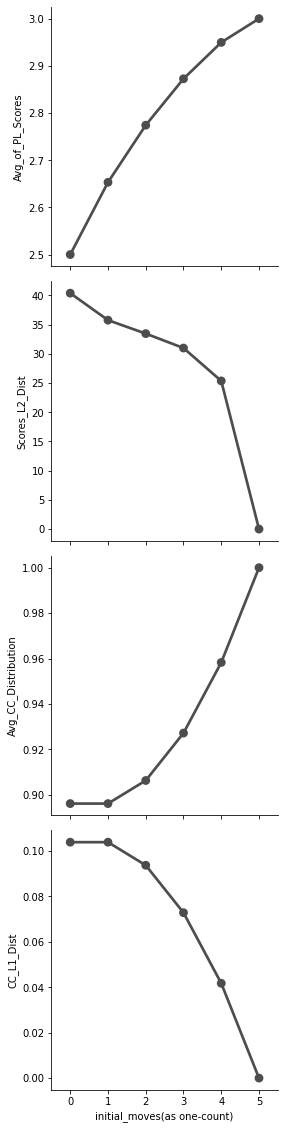

In [6]:
# Plots: Each point is the aggregate of 1000 tournaments with the same initial moves.

g = sns.PairGrid(df, 
                 y_vars=["Avg_of_PL_Scores",
                        "Scores_L2_Dist", 
                        "Avg_CC_Distribution",
                        "CC_L1_Dist"], 
                 x_vars=['initial_moves(as one-count)'], 
                 height=4)
g.map(sns.pointplot, color=".3")
plt.show()

In [7]:
for i in range(25):
    print()

### TESTING

In [8]:
params = five_four_params
data_dict_test = {}
start = time.time()

# Collect the tournament results
for j, i_im in enumerate(im_list):
    plyrs = []
    for i in range(len(params)):
        pl = axl.MemoryOnePlayer(tuple(params[i]),action_map[i_im[i]])
        plyrs.append(pl)
    # RPST payoff matrix - 3, 1, 0, 5 - classic config is also default
    pd100 = pd_exp2.PdTournament(plyrs, reps=100)

    df1, df2=pd100.data, pd100.agg_data
    data_dict_test[j]= (i_im, df1, df2)  # Tuple of initial moves, player norm 
                                     # scores by tournament, aggregate data for
                                     # 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~201.55 seconds

TypeError: 'int' object is not subscriptable

In [ ]:
# Process aggregate data of each tournament into a single dataframe for 
# comparison
agg_d_list = []
for key,val in data_dict_test.items():
    im_list, data, agg_data = val
    agg_data['initial_moves(as one-count)'] = im_list.count(1)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df=comparison_df[['initial_moves(as one-count)', 'P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution','CC_L1_Dist']]

df

In [ ]:
# Plots: Each point is the aggregate of 100 tournaments with the same initial moves.

g = sns.PairGrid(df, 
                 y_vars=["Avg_of_PL_Scores",
                        "Scores_L2_Dist", 
                        "Avg_CC_Distribution",
                        "CC_L1_Dist"], 
                 x_vars=['initial_moves(as one-count)'], 
                 height=4)
g.map(sns.pointplot, color=".3")
plt.show()

#### Experiment 1.1: How do the initial moves influence a larger group's outcomes?
__Approach__: Similar to experiment 1, but we consider tournaments of 15 players.

In [ ]:
# Initialize parameters
fifteen_four_params = np.ones((15,4))
print("15 player response probabilities: \n", fifteen_four_params)
im_list1= []
print("LIST of initial moves: ")
for i in range(16):
    im = [1 if n<i else 0 for n in range(15)]
    print(im)
    im_list1.append(im)

In [ ]:
params = fifteen_four_params
data_dict1_1 = {}
start = time.time()
for j, i_im in enumerate(im_list1):
    plyrs = []
    for i in range(len(params)):
        pl = axl.MemoryOnePlayer(tuple(params[i]),action_map[i_im[i]])
        plyrs.append(pl)

    # RPST payoff matrix - 3, 1, 0, 5 - classic config is also default
    pd1000 = pd_exp2.PdTournament(plyrs, reps=1000)

    df1, df2=pd1000.data, pd1000.agg_data
    data_dict1_1[j]= (i_im, df1, df2)  # Tuple of initial moves, player norm scores by tournament, aggregate data for 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~1087.048201084137 seconds

In [ ]:
# Process aggregate data of each tournament into a single dataframe for 
# comparison
agg_d_list = []
for key,val in data_dict1_1.items():
    im_list, data, agg_data = val
    agg_data['initial_moves(as one-count)'] = im_list.count(1)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df=comparison_df[['initial_moves(as one-count)', 'P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution','CC_L1_Dist']]

df

In [ ]:
g = sns.PairGrid(df, y_vars=["Avg_of_PL_Scores","Scores_L2_Dist", 
                             "Avg_CC_Distribution", "CC_L1_Dist"], x_vars=["initial_moves(as one-count)"], height=4)
g.map(sns.pointplot, color=".3")
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels) # set new labels
plt.show()

#### Experiement 2: How does a change in a single response probability for one player influence group outcomes?
__Approach__: Fix large majority of the response probability parameters 
to be the same but vary the first response probability for one player. All the 
other parameters will be equivalent across the players. Specifically, we run 
$k$ x 1000 tournaments with 5 players that have mostly similar response 
probabilities and fixed initial moves. $k$ is the number of variations of the 
response probability with which we experiment.

In [ ]:
# Initialize player parameters 
rng = np.random.default_rng(2)
random_prob = rng.integers(90, 100)/100
five_players = np.ones((5,4))

five_players[0,0] = random_prob
print("Five player response probabilities: \n", five_players)
im_list2 = np.ones((5))
print("LIST of initial moves: ", im_list2)

In [ ]:
# Initialize player parameters 
rng = np.random.default_rng(2)
random_prob = rng.integers(90, 100)/100
five_players = np.ones((5,4))

five_players[0,0] = random_prob
print("Five player response probabilities: \n", five_players)
im_list2 = np.ones((5))
print("LIST of initial moves: ", im_list2)

In [ ]:
params, initial_moves = five_players, im_list2
data_dict2 = {}
start = time.time()

for k in range(85,101):
    params[0,0] = k/100
    print("Five player response probabilities: \n", params)
    plyrs = []
    for j, p_i in enumerate(params):
        pl = axl.MemoryOnePlayer(tuple(p_i),action_map[im_list2[j]])
        plyrs.append(pl)

    # pd tournament 1000
    # RPST payoff matrix - 3, 1, 0, 5 - classic config is also default
    pd1000 = pd_exp2.PdTournament(plyrs, reps=1000)

    df1, df2=pd1000.data, pd1000.agg_data
    data_dict2[k]= (params[0,0], df1, df2)  # Tuple of initial moves, player norm scores by tournament, aggregate data for 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~308.2929379940033 seconds

In [ ]:
agg_d_list = []
for key,val in data_dict2.items():
    pl1_param, data, agg_data = val
    agg_data['pl1_p(C|CC)'] = str(pl1_param)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df=comparison_df[['pl1_p(C|CC)', 'P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution', 'CC_L1_Dist']]
df

In [ ]:
g = sns.PairGrid(df, y_vars=["Avg_of_PL_Scores","Scores_L2_Dist", 
                             "Avg_CC_Distribution", "CC_L1_Dist"], x_vars=["pl1_p(C|CC)"], height=4)
g.map(sns.pointplot, color=".3")
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels) # set new labels
plt.show()

#### Experiement 2.1: How does a change in a single response probability for one player influence larger group outcomes?
__Approach__: Similar to experiment 2, but this time with a group of 15 players.

In [ ]:
# Initialize parameters
rng = np.random.default_rng(3)
random_prob = rng.integers(90, 100)/100
fifteen_players = np.ones((15,4))

fifteen_players[0,0] = random_prob
print("Fifteen player response probabilities: \n", fifteen_players)
im_list3 = np.ones((15))
print("LIST of initial moves: ", im_list3)

In [ ]:
params, initial_moves = fifteen_players, im_list3
data_dict2_1 = {}
start = time.time()

# Collect results
for k in range(85,101):
    params[0,0] = k/100
    print("Variable response probability for first player: \n", params[0,0])
    plyrs = []
    for j, p_i in enumerate(params):
        pl = axl.MemoryOnePlayer(tuple(p_i),action_map[initial_moves[j]])
        plyrs.append(pl)

    pd1000 = pd_exp2.PdTournament(plyrs, reps=1000)

    df1, df2=pd1000.data, pd1000.agg_data
    data_dict2_1[k]= (params[0,0], df1, df2)  # Tuple of initial moves, player 
                                           # norm scores by tournament, 
                                           # aggregate data for 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~308.2929379940033 seconds

In [ ]:
agg_d_list = []
for key,val in data_dict2_1.items():
    pl1_param, data, agg_data = val
    agg_data['pl1_p(C|CC)'] = str(pl1_param)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df_players=comparison_df[['pl1_p(C|CC)','P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','P6_Avg_Norm_Score', 'P7_Avg_Norm_Score','P8_Avg_Norm_Score', 
           'P9_Avg_Norm_Score', 'P10_Avg_Norm_Score','P11_Avg_Norm_Score', 'P12_Avg_Norm_Score','P13_Avg_Norm_Score', 
           'P14_Avg_Norm_Score', 'P15_Avg_Norm_Score',]]
display(df_players)

df=comparison_df[['pl1_p(C|CC)','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution', 'CC_L1_Dist']]
df

In [ ]:
g = sns.PairGrid(df, y_vars=["Avg_of_PL_Scores","Scores_L2_Dist",
                             "Avg_CC_Distribution", "CC_L1_Dist"], 
                 x_vars=["pl1_p(C|CC)"], height=4)
g.map(sns.pointplot, color=".3")
# g.set(xticks=[0.85, 0.9, 0.95, 1])
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()
